In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("resources/customer_data.csv")
df
#kişiler daha önce etiketlenmiş, çeşitli özellikleri

,label,id,fea_1,fea_2,fea_3,fea_4,fea_5,fea_6,fea_7,fea_8,fea_9,fea_10,fea_11
0,1,54982665,5,1245.5,3,77000.0,2,15,5,109,5,151300,244.948974
1,0,59004779,4,1277.0,1,113000.0,2,8,-1,100,3,341759,207.173840
2,0,58990862,7,1298.0,1,110000.0,2,11,-1,101,5,72001,1.000000
3,1,58995168,7,1335.5,1,151000.0,2,11,5,110,3,60084,1.000000
4,0,54987320,7,NaN,2,59000.0,2,11,5,108,4,450081,197.403141
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1120,0,58988196,5,1289.0,1,173000.0,2,15,5,112,3,350702,200.000000
1121,0,58987926,5,NaN,2,50000.0,2,15,5,108,4,450000,169.000000
1122,0,58995381,7,1220.0,3,76000.0,2,11,2,90,5,71002,1.000000
1123,0,58998054,4,1250.0,3,137000.0,2,8,5,90,5,72000,1.000000


In [3]:
df.info()
#veri hakkında genel bilgi ediniyoruz.
#elimizde 1125 tane veri var kayıplar var 976 tane veriye sahibiz 
#bu veriyi kullanarak sınıflandırma yapamayız buna bir çözüm bulmamız gerekiyor

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1125 entries, 0 to 1124
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   label   1125 non-null   int64  
 1   id      1125 non-null   int64  
 2   fea_1   1125 non-null   int64  
 3   fea_2   976 non-null    float64
 4   fea_3   1125 non-null   int64  
 5   fea_4   1125 non-null   float64
 6   fea_5   1125 non-null   int64  
 7   fea_6   1125 non-null   int64  
 8   fea_7   1125 non-null   int64  
 9   fea_8   1125 non-null   int64  
 10  fea_9   1125 non-null   int64  
 11  fea_10  1125 non-null   int64  
 12  fea_11  1125 non-null   float64
dtypes: float64(3), int64(10)
memory usage: 114.4 KB


In [5]:
df.describe().T
#veriler hakkında sayısal bilgi veriyor.

,count,mean,std,min,25%,50%,75%,max
label,1125.0,2.000000e-01,4.001779e-01,0.0,0.0,0.000000e+00,0.000000e+00,1.000000e+00
id,1125.0,5.783677e+07,1.817150e+06,54982353.0,54990497.0,5.898975e+07,5.899799e+07,5.900624e+07
fea_1,1125.0,5.482667e+00,1.383338e+00,1.0,4.0,5.000000e+00,7.000000e+00,7.000000e+00
fea_2,976.0,1.283911e+03,5.176402e+01,1116.5,1244.0,1.281500e+03,1.314500e+03,1.481000e+03
fea_3,1125.0,2.333333e+00,8.787730e-01,1.0,1.0,3.000000e+00,3.000000e+00,3.000000e+00
fea_4,1125.0,1.208836e+05,8.844523e+04,15000.0,72000.0,1.020000e+05,1.390000e+05,1.200000e+06
fea_5,1125.0,1.928889e+00,2.571247e-01,1.0,2.0,2.000000e+00,2.000000e+00,2.000000e+00
fea_6,1125.0,1.087200e+01,2.676437e+00,3.0,8.0,1.100000e+01,1.100000e+01,1.600000e+01
fea_7,1125.0,4.832889e+00,2.971182e+00,-1.0,5.0,5.000000e+00,5.000000e+00,1.000000e+01
fea_8,1125.0,1.008027e+02,1.198896e+01,64.0,90.0,1.050000e+02,1.110000e+02,1.150000e+02


In [6]:
df.fea_2.mean(), df.fea_2.median()
#mean ve median çok yakın birbirine birini kullansak yeterli 

(1283.9113729508197, 1281.5)

In [7]:
df.fea_2.fillna(df.fea_2.mean(), inplace = True)
df.isna().sum()
#hiç nul veri kalmadı elimizde ortalamayla doldurduk boş
#olanları isnasum ile elimdeki veri hala boş var mı diye bsktık 

label     0
id        0
fea_1     0
fea_2     0
fea_3     0
fea_4     0
fea_5     0
fea_6     0
fea_7     0
fea_8     0
fea_9     0
fea_10    0
fea_11    0
dtype: int64

In [8]:
df.label.value_counts()
#elimizde kaç tane 0-1 olduğunu gösterdi dengesiz bir veri seti

0    900
1    225
Name: label, dtype: int64

<AxesSubplot:title={'center':'Risk Dağılım Grafiği'}, xlabel='Risk_Duzeyi', ylabel='Toplam_Sayi'>

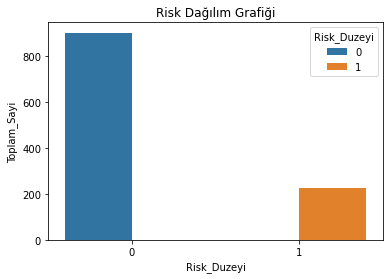

In [15]:
import seaborn as sns #veri görselleştirme için kullanılır.sütundaki farklı 
                      #kategorilerin sayısını görselleştirmek üzere bir çubuk grafik oluşturur.
import matplotlib.pyplot as plt

label_count = pd.DataFrame(
    {
        "Risk_Duzeyi":df.label.value_counts().index,
        "Toplam_Sayi":df.label.value_counts().values
    }
)
#label_count
plt.title("Risk Dağılım Grafiği")
sns.barplot(data=label_count, x="Risk_Duzeyi", y="Toplam_Sayi", hue="Risk_Duzeyi")
#hue veriyi renklendirmek için kullanılacak sütunu belirler.

<AxesSubplot:>

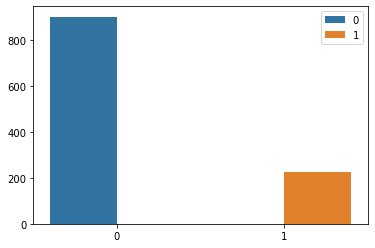

In [18]:
sns.barplot(x=df.label.value_counts().index, y=df.label.value_counts().values, hue=df.label.value_counts().index)
#dataframesiz yaptık

In [31]:
#X ve y yi belirlememiz gerekiyor.
X = df.drop("label", axis=1)#'label' sütununu (hedef değişkeni) veri çerçevesinden çıkarır. Yani,
#'label' sütunu hariç diğer tüm sütunları içeren yeni bir veri çerçevesi oluşturur. 
y = df.label
#X değişkeni bağımsız değişkenleri içerirken, y değişkeni bağımlı değişkeni içerir.
#Bu, bir sınıflandırma veya regresyon modeli eğitirken bağımsız ve bağımlı değişkenleri belirlemek için yaygın bir yaklaşımdır.


In [32]:
X

,id,fea_1,fea_2,fea_3,fea_4,fea_5,fea_6,fea_7,fea_8,fea_9,fea_10,fea_11
0,54982665,5,1245.500000,3,77000.0,2,15,5,109,5,151300,244.948974
1,59004779,4,1277.000000,1,113000.0,2,8,-1,100,3,341759,207.173840
2,58990862,7,1298.000000,1,110000.0,2,11,-1,101,5,72001,1.000000
3,58995168,7,1335.500000,1,151000.0,2,11,5,110,3,60084,1.000000
4,54987320,7,1283.911373,2,59000.0,2,11,5,108,4,450081,197.403141
...,...,...,...,...,...,...,...,...,...,...,...,...
1120,58988196,5,1289.000000,1,173000.0,2,15,5,112,3,350702,200.000000
1121,58987926,5,1283.911373,2,50000.0,2,15,5,108,4,450000,169.000000
1122,58995381,7,1220.000000,3,76000.0,2,11,2,90,5,71002,1.000000
1123,58998054,4,1250.000000,3,137000.0,2,8,5,90,5,72000,1.000000


In [33]:
y

0       1
1       0
2       0
3       1
4       0
       ..
1120    0
1121    0
1122    0
1123    0
1124    0
Name: label, Length: 1125, dtype: int64

In [34]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2,
                                                   random_state = 42,
                                                   stratify=y)
#%80 eğitim %20 test dengesiz ya y dengeli dağılmaya çalışsın diye stratify 
#sınıflandırma problemlerinde sınıf dengesini korumak için kullanılır. 
#genellikle modelin eğitim seti üzerinde öğrenmesi ve test seti üzerinde performansının değerlendirilmesi amacıyla kullanılır.
#Bu, modelin genelleme yeteneğini değerlendirmek için önemlidir.

In [35]:
from sklearn.ensemble import RandomForestClassifier
#Bu ifade, sklearn kütüphanesindeki RandomForestClassifier sınıflandırıcı modelini içe aktarır.
#RandomForestClassifier sınıflandırıcı modelini kullanarak bir makine öğrenimi modelini eğitiyor.
model_rf = RandomForestClassifier()#birçok karar ağacının bir araya getirilerek oluşturulan bir orman modelidir.
model_rf.fit(X_train, y_train)


RandomForestClassifier()

In [37]:
from sklearn.metrics import classification_report, confusion_matrix

print(classification_report(y_test, model_rf.predict(X_test)))
#karmaşıklık matrisi confusion_matris

              precision    recall  f1-score   support

           0       0.80      0.98      0.89       180
           1       0.40      0.04      0.08        45

    accuracy                           0.80       225
   macro avg       0.60      0.51      0.48       225
weighted avg       0.72      0.80      0.72       225



<AxesSubplot:>

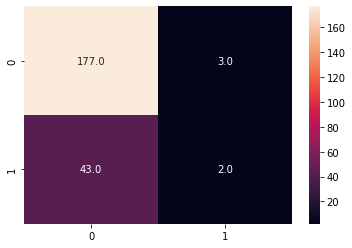

In [38]:
sns.heatmap(confusion_matrix(y_test, model_rf.predict(X_test)),
           annot= True, fmt=".1f")
#modelde 0 da 43 se predicte 177 tane 175 tane veri doğrı 55 tanesi yanlış

In [39]:
#tn fn
#fb tp 

In [41]:
from sklearn.tree import DecisionTreeClassifier 

model_tree = DecisionTreeClassifier()
model_tree.fit(X_train, y_train)

DecisionTreeClassifier()

In [42]:
print(classification_report(y_test, model_tree.predict(X_test)))

              precision    recall  f1-score   support

           0       0.80      0.76      0.78       180
           1       0.20      0.24      0.22        45

    accuracy                           0.66       225
   macro avg       0.50      0.50      0.50       225
weighted avg       0.68      0.66      0.67       225



In [ ]:
#randomforest daha iyi sonuç verdi

In [43]:
from imblearn.over_sampling import RandomOverSampler
#sınıf dengesizliği sorunuyla başa çıkmak için kullanılan bir örnekleme (oversampling) tekniğidir.

#Sınıf dengesizliği, bir sınıfın diğerine göre çok daha fazla örneğe sahip olması durumudur. 

In [45]:
sampler = RandomOverSampler()# tüm sınıfların örnek sayısını eşitlemek için tasarlanmıştır.
X_new, y_new = sampler.fit_resample(X,y)#örnek içeren sınıfların örnek sayısını artırırken, çok örnek içeren sınıfları değiştirmez.

In [46]:
y_new.value_counts()
#rastgele olarak verileri oluşturdu artık iki sınıftanda eşit sayıda veriler var

1    900
0    900
Name: label, dtype: int64

In [49]:
X_newtr, X_newts, y_newtr, y_newts = train_test_split(X_new, y_new, test_size = 0.2,
                                                   random_state = 42)

In [50]:
model_rfn = RandomForestClassifier()
model_rfn.fit(X_newtr, y_newtr)
#Bu model, eğitildikten sonra, yeni veri setindeki örnekleri sınıflandırma yeteneğine sahip olacaktır

RandomForestClassifier()

In [51]:
print(classification_report(y_newts, model_rfn.predict(X_newts)))
#elimizde dengeli bir veri seti varsa başarı oranımız daha yüksektir.
#aşağıdakilerin nasıl hesaplandığına bak

              precision    recall  f1-score   support

           0       0.95      0.89      0.92       176
           1       0.90      0.96      0.93       184

    accuracy                           0.92       360
   macro avg       0.92      0.92      0.92       360
weighted avg       0.92      0.92      0.92       360

